# Sensor Projection

*To be completed...*

## Setup

In [278]:
import sys

# ! {sys.executable} -m pip install --quiet numpy --upgrade
# ! {sys.executable} -m pip install --quiet plotly

# ! {sys.executable} -m pip install --quiet --index-url https://test.pypi.org/simple/ LibraryCorePy==0.1.9
# ! {sys.executable} -m pip install --quiet --index-url https://test.pypi.org/simple/ LibraryMathematicsPy==0.1.5
# ! {sys.executable} -m pip install --quiet --index-url https://test.pypi.org/simple/ LibraryPhysicsPy==0.1.3

In [279]:
# import numpy as np
# import pandas as pd

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.graph_objs as go

# init_notebook_mode(connected=True)

In [280]:
import Library.Core as Core
import Library.Mathematics as Mathematics
import Library.Physics as Physics

In [281]:
Object2 = Mathematics.Geometry.D2.Object
Point2 = Mathematics.Geometry.D2.Objects.Point
Polygon2 = Mathematics.Geometry.D2.Objects.Polygon
Point3 = Mathematics.Geometry.D3.Objects.Point
Polygon3 = Mathematics.Geometry.D3.Objects.Polygon
Ellipsoid = Mathematics.Geometry.D3.Objects.Ellipsoid
Pyramid = Mathematics.Geometry.D3.Objects.Pyramid

Length = Physics.Units.Length
Angle = Physics.Units.Angle
Scale = Physics.Time.Scale
Instant = Physics.Time.Instant
Duration = Physics.Time.Duration
Interval = Physics.Time.Interval
DateTime = Physics.Time.DateTime
LLA = Physics.Coordinate.Spherical.LLA
Position = Physics.Coordinate.Position
Frame = Physics.Coordinate.Frame
Environment = Physics.Environment
Geometry = Physics.Environment.Object.Geometry
Earth = Physics.Environment.Objects.CelestialBodies.Earth

---

## Scene

Set up a simple scene, with the Earth only.

In [282]:
environment = Environment.Default() ;

In [283]:
earth = environment.accessObjectWithName("Earth")

In [284]:
earth_geometry = earth.getGeometryIn(Frame.ITRF())

In [285]:
# print(earth_geometry)

## Pyramidal

Setup pyramidal observer

In [286]:
apex = Point3(7000e3, 0.0, 0.0)
base = Polygon3(Polygon2([Point2(-1.0, -1.0), Point2(+1.0, -1.0), Point2(+1.0, +1.0), Point2(-1.0, +1.0)]), apex - np.array((0.8, 0.0, 0.0)), np.array((0.0, 1.0, 0.0)), np.array((0.0, 0.0, 1.0)))

pyramid = Pyramid(base, apex)

In [287]:
observer_geometry = Geometry(pyramid, Frame.ITRF())

In [288]:
# observer_geometry

In [289]:
intersection_ITRF = observer_geometry.intersectionWith(earth_geometry)

In [290]:
# intersection_ITRF

In [291]:
intersection_points = [Point2(lla.getLongitude().inDegrees(), lla.getLatitude().inDegrees()) for lla in [LLA.Cartesian(point_ITRF, Earth.EquatorialRadius, Earth.Flattening) for point_ITRF in intersection_ITRF.asLineString()]]

In [292]:
intersection_polygon = Polygon2(intersection_points)

In [293]:
intersection_df = pd.DataFrame([[intersection_point.x(), intersection_point.y()] for intersection_point in intersection_points], columns=['Longitude', 'Latitude']) ;

In [294]:
intersection_df.head()

,Longitude,Latitude
0,-30.506515,-8.364409
1,-27.284663,-2.497340
2,-27.284663,2.497340
3,-30.506515,8.364409
4,-9.788308,30.748416


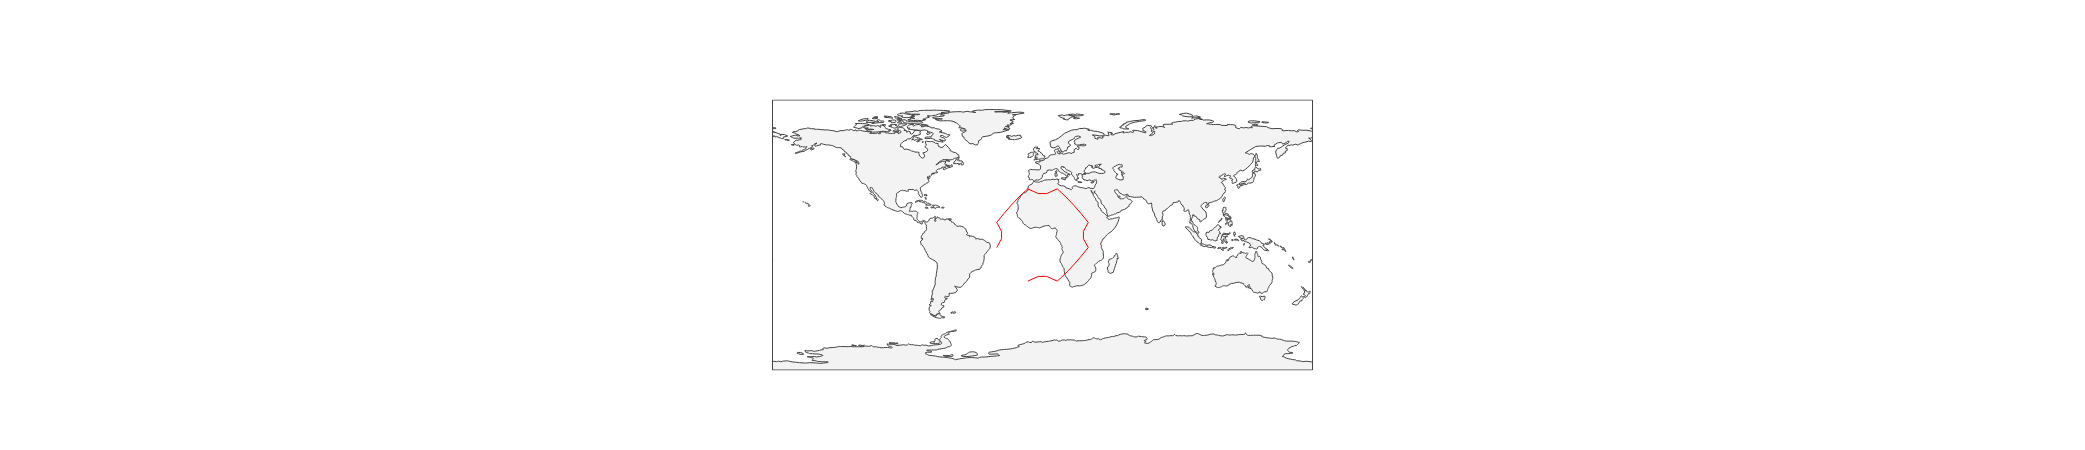

In [295]:
data = []

data.append(
    dict(
        type = 'scattergeo',
        lon = intersection_df['Longitude'],
        lat = intersection_df['Latitude'],
        mode = 'lines',
        line = dict(
            width = 1,
            color = 'red',
        )
    )
)
    
layout = dict(
        title = None,
        showlegend = False, 
        geo = dict(
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict(data=data, layout=layout)
iplot(fig)

In [296]:
intersection_polygon.toString(Object2.Format.WKT)

POLYGON((-30.5065 -8.36441,-27.2847 -2.49734,-27.2847 2.49734,-30.5065 8.36441,-9.78831 30.7484,-2.81559 27.622,2.81559 27.622,9.78831 30.7484,30.5065 8.36441,27.2847 2.49734,27.2847 -2.49734,30.5065 -8.36441,9.78831 -30.7484,2.81559 -27.622,-2.81559 -27.622,-9.78831 -30.7484,-30.5065 -8.36441))